In [1]:
import numpy as np
import pymysql
from datetime import datetime
import matplotlib.pyplot as plt
from collections import defaultdict
import math
import json
import time

import os
import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 100)

In [2]:
data_folder = 'data'

## Data

In [3]:
static_data = pd.read_csv('{}/set-b_df_baseline.csv'.format(data_folder))
dynamic_data = pd.read_csv('{}/set-b_df_timeseries.csv'.format(data_folder))
outcomes = pd.read_csv('{}/Outcomes-b.csv'.format(data_folder))

### Static data

In [4]:
static_data.head()

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight
0,0,144404,71,1,172.7,4,74.2
1,1,148558,76,0,-1.0,3,76.3
2,2,146575,42,0,172.7,3,136.4
3,3,142713,90,0,-1.0,4,54.1
4,4,145068,45,1,175.3,1,103.0


In [5]:
static_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4000 non-null   int64  
 1   RecordID    4000 non-null   int64  
 2   Age         4000 non-null   int64  
 3   Gender      4000 non-null   int64  
 4   Height      4000 non-null   float64
 5   ICUType     4000 non-null   int64  
 6   Weight      4000 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 218.9 KB


In [6]:
static_data.describe()

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,147740.094750,64.612000,0.562000,87.316975,2.807500,74.310633
std,1154.844867,2949.498256,17.142037,0.498717,85.879238,1.023086,32.839311
min,0.000000,142675.000000,16.000000,-1.000000,-1.000000,1.000000,-1.000000
25%,999.750000,145157.250000,53.000000,0.000000,-1.000000,2.000000,62.000000
50%,1999.500000,147739.000000,67.000000,1.000000,149.900000,3.000000,75.800000
75%,2999.250000,150285.500000,78.000000,1.000000,170.200000,4.000000,90.000000
max,3999.000000,152864.000000,90.000000,1.000000,462.300000,4.000000,472.000000


In [7]:
static_data['Gender']=static_data['Gender'].astype('category')
static_data['ICUType']=static_data['ICUType'].astype('category')

#### Age

<AxesSubplot:ylabel='Frequency'>

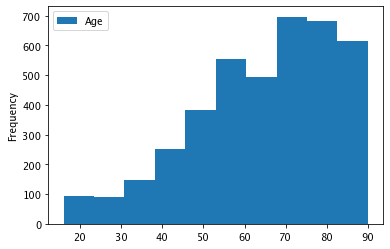

In [8]:
static_data.plot(y='Age', kind='hist')

#### Gender

In [9]:
static_data[static_data['Gender']==-1]

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight
421,421,146615,34,-1,-1.0,3,73.8
2268,2268,143896,47,-1,-1.0,3,49.9
2554,2554,144078,86,-1,-1.0,3,59.8
2671,2671,147570,38,-1,-1.0,3,133.6
3641,3641,148436,78,-1,185.4,2,83.7


In [10]:
static_data.loc[static_data['Gender']==-1,'Gender']=1
static_data[static_data['Gender']==-1]

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight


<AxesSubplot:>

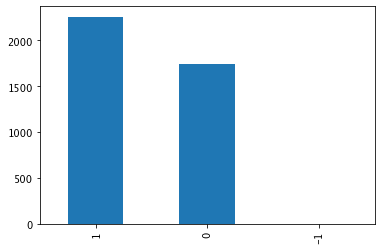

In [11]:
static_data.Gender.value_counts().plot(kind='bar')

#### Height

In [12]:
static_data[static_data['Height']==-1]

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight
1,1,148558,76,0,-1.0,3,76.3
3,3,142713,90,0,-1.0,4,54.1
9,9,150465,29,0,-1.0,4,100.0
10,10,151753,26,0,-1.0,3,66.0
13,13,144438,77,0,-1.0,1,-1.0
...,...,...,...,...,...,...,...
3995,3995,148227,83,0,-1.0,3,-1.0
3996,3996,150468,52,1,-1.0,4,107.0
3997,3997,151776,72,0,-1.0,3,-1.0
3998,3998,145703,77,0,-1.0,3,49.9


In [13]:
mean_height = static_data[static_data['Height']!=-1]['Height'].mean()
mean_height

169.66082125603864

In [14]:
static_data.loc[static_data['Height']==-1, 'Height']=mean_height
static_data[static_data['Height']==-1]

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight


In [15]:
static_data['Height'].describe()

count    4000.000000
mean      169.660821
std        10.053136
min         5.100000
25%       169.660821
50%       169.660821
75%       170.200000
max       462.300000
Name: Height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

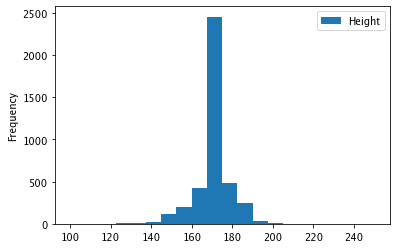

In [16]:
static_data['Height'].plot(kind='hist', range = (100, 250), bins=20, legend=['Height'])

#### ICUType

In [17]:
static_data['ICUType'].describe()

count     4000
unique       4
top          3
freq      1436
Name: ICUType, dtype: int64

<AxesSubplot:>

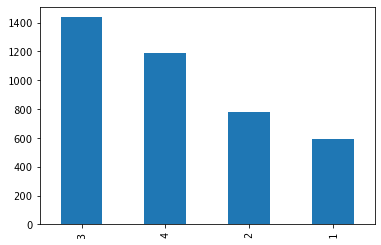

In [18]:
static_data['ICUType'].value_counts().plot(kind='bar')

#### Weight

In [19]:
static_data[static_data['Weight']==-1]

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight
13,13,144438,77,0,169.660821,1,-1.0
27,27,151784,58,1,169.660821,3,-1.0
28,28,144160,45,0,169.660821,3,-1.0
57,57,144835,77,0,169.660821,3,-1.0
67,67,149524,57,0,169.660821,1,-1.0
...,...,...,...,...,...,...,...
3966,3966,142939,77,0,169.660821,3,-1.0
3975,3975,145918,53,0,169.660821,3,-1.0
3990,3990,151762,57,1,169.660821,3,-1.0
3995,3995,148227,83,0,169.660821,3,-1.0


In [20]:
mean_weight = static_data[static_data['Weight']!=-1]['Weight'].mean()
mean_weight

81.46442102381604

In [21]:
static_data.loc[static_data['Weight']==-1, 'Weight']=mean_weight
static_data[static_data['Weight']==-1]

,Unnamed: 0,RecordID,Age,Gender,Height,ICUType,Weight


In [22]:
static_data['Weight'].describe()

count    4000.000000
mean       81.464421
std        23.227770
min        30.000000
25%        67.000000
50%        80.000000
75%        90.000000
max       472.000000
Name: Weight, dtype: float64

<AxesSubplot:ylabel='Frequency'>

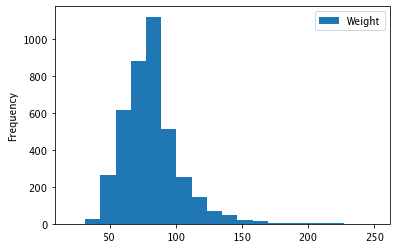

In [23]:
static_data['Weight'].plot(kind='hist', range = (20, 250), bins=20, legend=['Weight'])

### Dynamic Data

In [24]:
dynamic_data.head()

,Unnamed: 0,time,parameter,value,RecordID
0,0,4,DiasABP,60.0,144404
1,1,4,GCS,11.0,144404
2,2,4,HR,85.0,144404
3,3,4,MAP,90.0,144404
4,4,4,NIDiasABP,68.0,144404


In [25]:
dynamic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738534 entries, 0 to 1738533
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   time        int64  
 2   parameter   object 
 3   value       float64
 4   RecordID    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 66.3+ MB


In [26]:
dynamic_data.describe()

,Unnamed: 0,time,value,RecordID
count,1.738534e+06,1.738534e+06,1.738534e+06,1.738534e+06
mean,8.692665e+05,1.342517e+03,7.564438e+01,1.477451e+05
std,5.018717e+05,8.403144e+02,1.009252e+02,2.953503e+03
min,0.000000e+00,0.000000e+00,-1.780000e+01,1.426750e+05
25%,4.346332e+05,5.880000e+02,3.760000e+01,1.451430e+05
50%,8.692665e+05,1.297000e+03,7.100000e+01,1.477680e+05
75%,1.303900e+06,2.065000e+03,9.800000e+01,1.502900e+05
max,1.738533e+06,2.880000e+03,1.999000e+04,1.528640e+05


In [27]:
parameter = dynamic_data['parameter'].unique()
parameter

array(['DiasABP', 'GCS', 'HR', 'MAP', 'NIDiasABP', 'NIMAP', 'NISysABP',
       'SysABP', 'Temp', 'Urine', 'Weight', 'FiO2', 'MechVent', 'pH',
       'PaCO2', 'PaO2', 'SaO2', 'Albumin', 'ALP', 'ALT', 'AST',
       'Bilirubin', 'BUN', 'Creatinine', 'Glucose', 'HCO3', 'HCT', 'Mg',
       'Platelets', 'K', 'Na', 'WBC', 'Lactate', 'Cholesterol',
       'RespRate', 'TroponinT', 'TroponinI'], dtype=object)

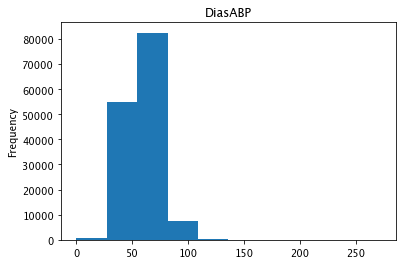

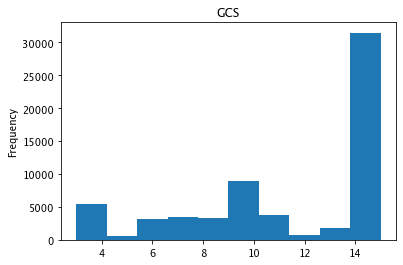

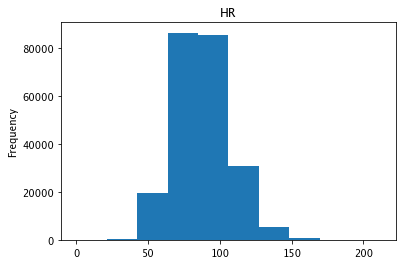

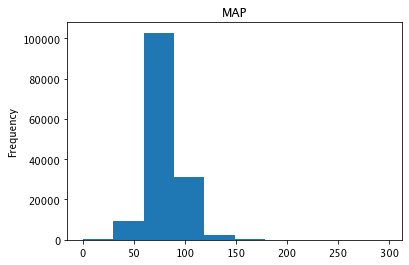

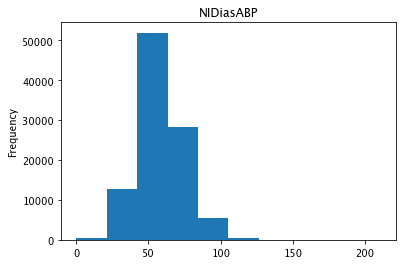

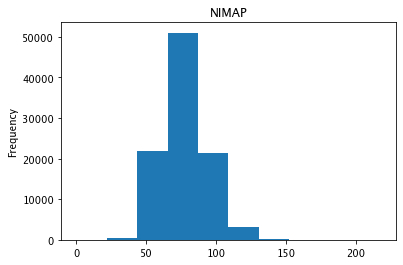

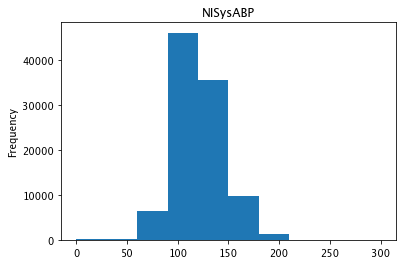

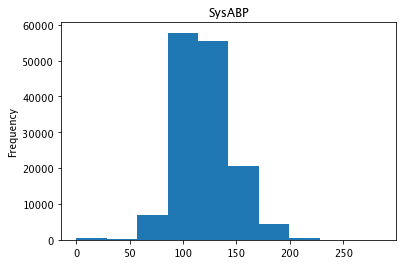

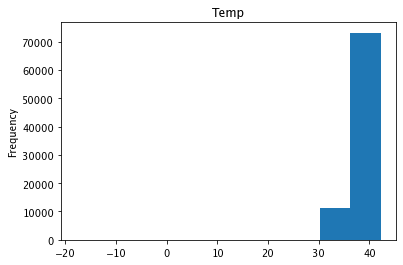

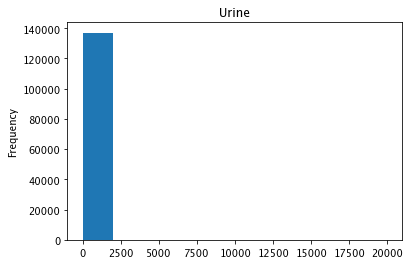

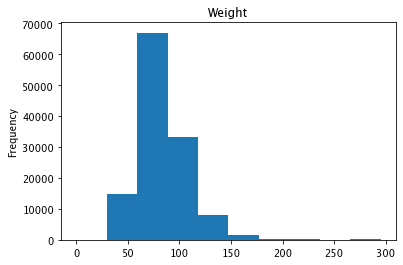

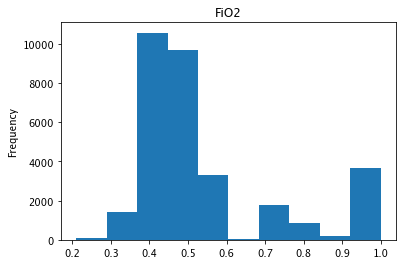

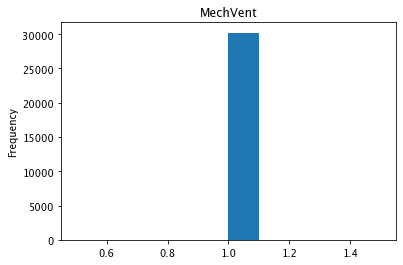

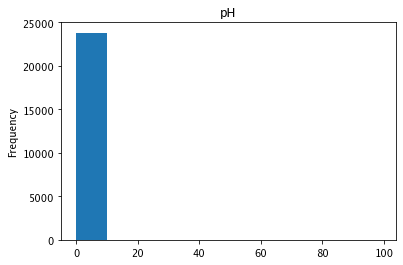

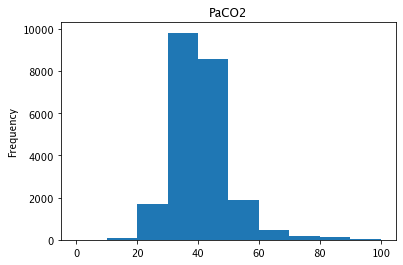

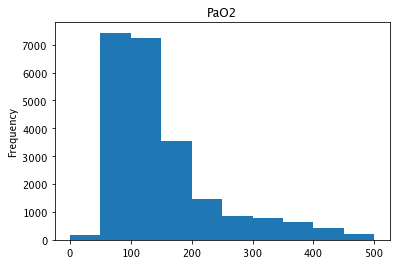

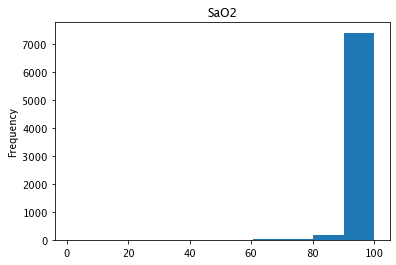

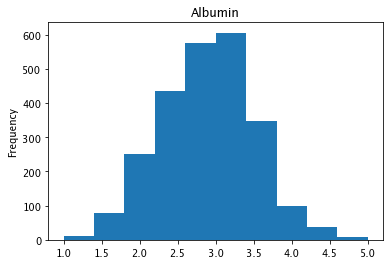

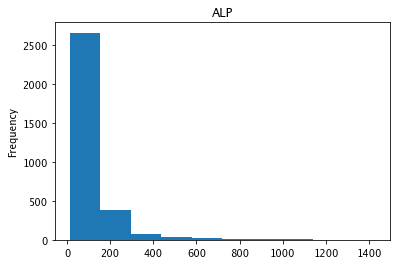

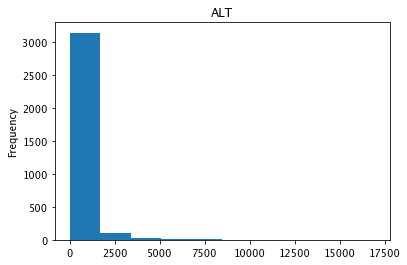

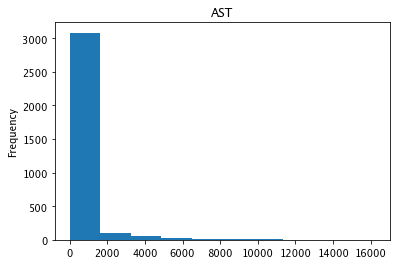

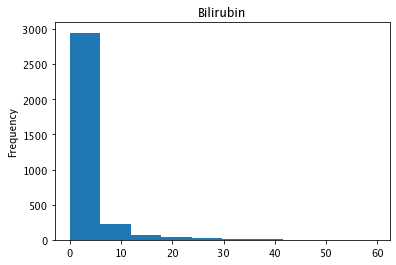

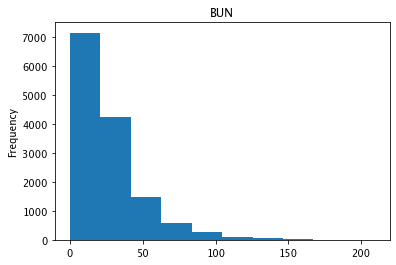

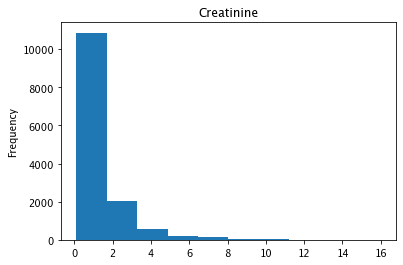

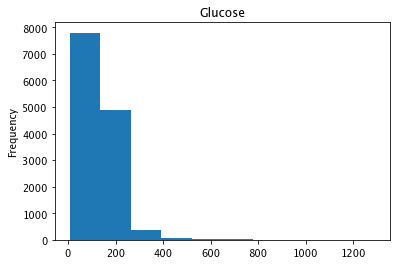

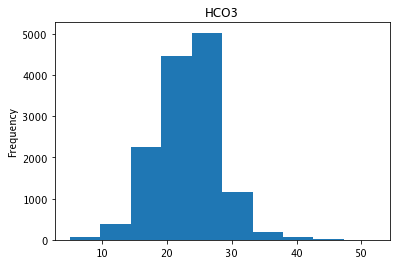

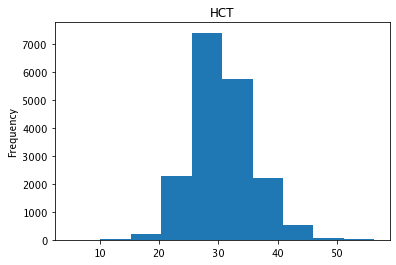

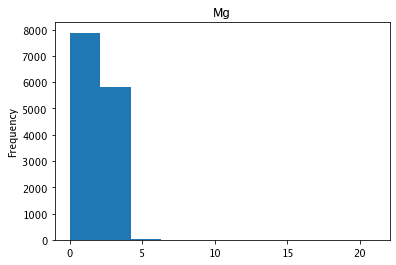

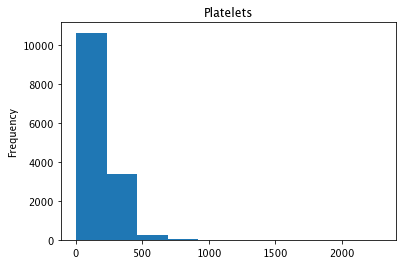

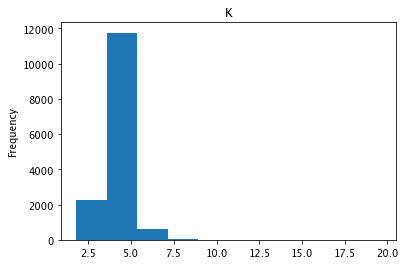

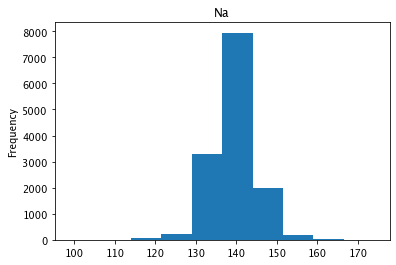

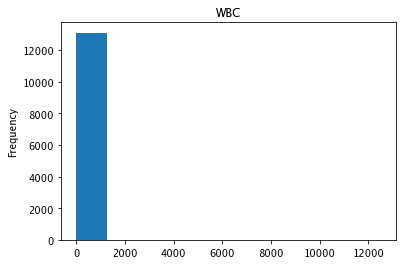

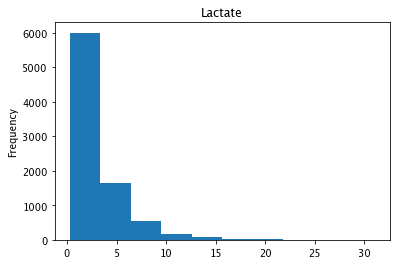

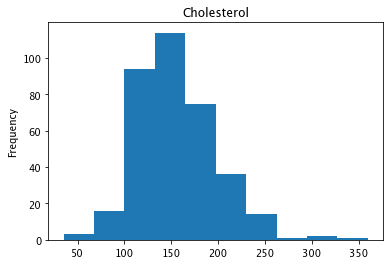

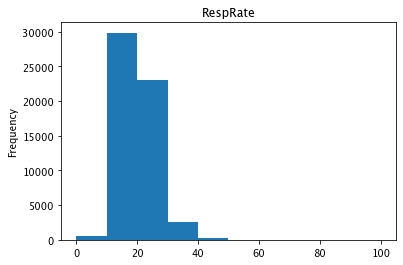

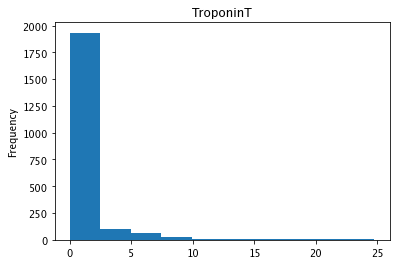

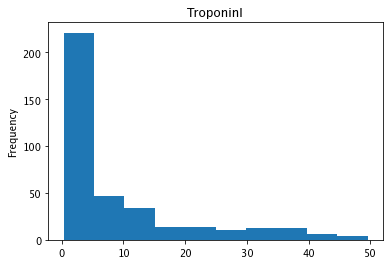

In [28]:
#static_data['Weight'].plot(kind='hist', range = (20, 250), bins=20, legend=['Weight'])
for p in parameter:
    dynamic_data[dynamic_data['parameter']==p]['value'].plot(kind='hist', title=p)
    plt.show()

### Outcomes

In [29]:
outcomes.head()

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
0,142675,27,14,9,7,1
1,142676,12,1,31,468,0
2,142680,12,7,17,16,1
3,142683,19,15,17,-1,0
4,142688,3,0,9,-1,0


In [30]:
outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   RecordID           4000 non-null   int64
 1   SAPS-I             4000 non-null   int64
 2   SOFA               4000 non-null   int64
 3   Length_of_stay     4000 non-null   int64
 4   Survival           4000 non-null   int64
 5   In-hospital_death  4000 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB


In [31]:
outcomes.describe()

,RecordID,SAPS-I,SOFA,Length_of_stay,Survival,In-hospital_death
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,147740.094750,14.284000,6.326750,13.728000,132.118250,0.142000
std,2949.498256,6.001237,4.273061,13.168822,365.852642,0.349094
min,142675.000000,-1.000000,-1.000000,-1.000000,-23.000000,0.000000
25%,145157.250000,11.000000,3.000000,6.000000,-1.000000,0.000000
50%,147739.000000,15.000000,6.000000,10.000000,-1.000000,0.000000
75%,150285.500000,18.000000,9.000000,17.000000,19.000000,0.000000
max,152864.000000,33.000000,22.000000,171.000000,2620.000000,1.000000


<AxesSubplot:title={'center':'Length of stay'}, ylabel='Frequency'>

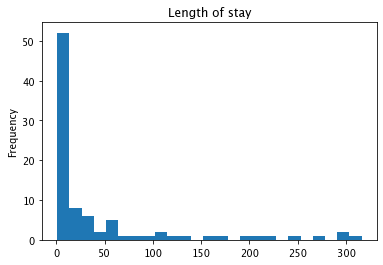

In [32]:
outcomes['Length_of_stay'].value_counts().plot(kind='hist', bins=25, title='Length of stay')

## Forming the dataset

Assuming time is provided in hours

In [33]:
dynamic_data['time'].min(), dynamic_data['time'].max()

(0, 2880)

In [60]:
dynamic_data.head()

,Unnamed: 0,time,parameter,value,RecordID
0,0,4,DiasABP,60.0,144404
1,1,4,GCS,11.0,144404
2,2,4,HR,85.0,144404
3,3,4,MAP,90.0,144404
4,4,4,NIDiasABP,68.0,144404


In [68]:
df = pd.merge(static_data, outcomes, on=['RecordID'])
df = df[df['Length_of_stay']>1]
df2 = pd.merge(dynamic_data, df, on=['RecordID'], how='inner')
drop_cols = ['Unnamed: 0_x', 'Unnamed: 0_y', 'SAPS-I', 'SOFA', 'Survival', 'In-hospital_death']
df2 = df2.drop(drop_cols, axis='columns')

In [69]:
dynamic_data.shape, df2.shape

((1738534, 5), (1720978, 10))

In [70]:
df2.describe()

,time,value,RecordID,Age,Height,Weight,Length_of_stay
count,1.720978e+06,1.720978e+06,1.720978e+06,1.720978e+06,1.720978e+06,1.720978e+06,1.720978e+06
mean,1.341986e+03,7.560401e+01,1.477475e+05,6.492318e+01,1.696672e+02,8.136557e+01,1.447896e+01
std,8.404158e+02,1.012175e+02,2.953386e+03,1.689644e+01,1.070794e+01,2.295686e+01,1.335769e+01
min,0.000000e+00,-1.780000e+01,1.426750e+05,1.600000e+01,5.100000e+00,3.000000e+01,2.000000e+00
25%,5.870000e+02,3.750000e+01,1.451460e+05,5.400000e+01,1.676000e+02,6.700000e+01,7.000000e+00
50%,1.296000e+03,7.100000e+01,1.477770e+05,6.800000e+01,1.696608e+02,7.950000e+01,1.000000e+01
75%,2.064000e+03,9.800000e+01,1.502898e+05,7.800000e+01,1.727000e+02,9.070000e+01,1.800000e+01
max,2.880000e+03,1.999000e+04,1.528640e+05,9.000000e+01,4.623000e+02,4.720000e+02,1.710000e+02


In [71]:
df2.head()

,time,parameter,value,RecordID,Age,Gender,Height,ICUType,Weight,Length_of_stay
0,4,DiasABP,60.0,144404,71,1,172.7,4,74.2,76
1,4,GCS,11.0,144404,71,1,172.7,4,74.2,76
2,4,HR,85.0,144404,71,1,172.7,4,74.2,76
3,4,MAP,90.0,144404,71,1,172.7,4,74.2,76
4,4,NIDiasABP,68.0,144404,71,1,172.7,4,74.2,76


In [92]:
df2[df2['RecordID']==144404].sort_values('time')

,time,parameter,value,RecordID,Age,Gender,Height,ICUType,Weight,Length_of_stay
0,4,DiasABP,60.0,144404,71,1,172.7,4,74.2,76
10,4,Weight,74.2,144404,71,1,172.7,4,74.2,76
9,4,Urine,140.0,144404,71,1,172.7,4,74.2,76
7,4,SysABP,136.0,144404,71,1,172.7,4,74.2,76
6,4,NISysABP,147.0,144404,71,1,172.7,4,74.2,76
...,...,...,...,...,...,...,...,...,...,...
417,2824,NIDiasABP,47.0,144404,71,1,172.7,4,74.2,76
418,2824,NIMAP,61.0,144404,71,1,172.7,4,74.2,76
419,2824,NISysABP,109.0,144404,71,1,172.7,4,74.2,76
420,2824,Urine,110.0,144404,71,1,172.7,4,74.2,76


In [89]:
ids = df2.RecordID.unique()

In [90]:
record_list = []
static_cols = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'Length_of_stay']

cols = ['time'] + static_cols + list(parameter)
for i in ids:
    df_id = df2[df2['RecordID']==i].sort_values('time')
    static_values = df_id.iloc[0, 1:len(static_cols)] 
    r_init = [0] + static_values + ['']*(len(cols)-len(static_cols))
    record_list.append(r_init)
    for row in df2.itertuples():
        record = [row['time']] + static_values + row
        records.append(record)

data = pd.DataFrame(records, columns=cols)

,time,RecordID,Age,Gender,Height,ICUType,Weight,Length_of_stay,DiasABP,GCS,...,Mg,Platelets,K,Na,WBC,Lactate,Cholesterol,RespRate,TroponinT,TroponinI


In [97]:
len(cols)

45

In [110]:
static_cols = ['RecordID', 'Age', 'Gender', 'Height', 'ICUType', 'Weight', 'Length_of_stay']
cols = ['time'] + static_cols + list(parameter).remove('Weight')

TypeError: can only concatenate list (not "NoneType") to list

In [105]:
cols.remove('Weight')

In [107]:
cols

['time',
 'RecordID',
 'Age',
 'Gender',
 'Height',
 'ICUType',
 'Length_of_stay',
 'DiasABP',
 'GCS',
 'HR',
 'MAP',
 'NIDiasABP',
 'NIMAP',
 'NISysABP',
 'SysABP',
 'Temp',
 'Urine',
 'Weight',
 'FiO2',
 'MechVent',
 'pH',
 'PaCO2',
 'PaO2',
 'SaO2',
 'Albumin',
 'ALP',
 'ALT',
 'AST',
 'Bilirubin',
 'BUN',
 'Creatinine',
 'Glucose',
 'HCO3',
 'HCT',
 'Mg',
 'Platelets',
 'K',
 'Na',
 'WBC',
 'Lactate',
 'Cholesterol',
 'RespRate',
 'TroponinT',
 'TroponinI']